In [10]:
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go

In [11]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("Resources/survey.csv",
                 index_col="Timestamp",
                 parse_dates=True
                )

# Preview the dataset
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [12]:
#Binning ages
bins = [17, 25, 30, 35, 40, 45, 50]

# Define labels for the bins
labels = ['18-25', '26-30', '31-35', '36-40', '41-45', '46-50']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
display(df['age_group'].value_counts())
display(df.head(10))

'''df_dummies_age = pd.get_dummies(df['age_group'], prefix='age_group')
df_dummies_age'''

age_group
26-30    362
31-35    339
18-25    217
36-40    185
41-45     92
46-50     30
Name: count, dtype: int64

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,36-40
2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Maybe,No,No,No,No,No,Don't know,No,NaN,41-45
2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,31-35
2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,31-35
2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,31-35
2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,...,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN,31-35
2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,...,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN,31-35
2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,...,No,No,No,No,No,No,No,No,NaN,36-40
2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,...,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN,41-45


"df_dummies_age = pd.get_dummies(df['age_group'], prefix='age_group')\ndf_dummies_age"

In [13]:
my_df = df[['Gender','work_interfere','benefits','care_options','wellness_program','seek_help','leave','mental_health_consequence','phys_health_consequence','family_history','treatment',
            'remote_work','tech_company','anonymity','coworkers','supervisor','mental_health_interview', 'phys_health_interview','mental_vs_physical','obs_consequence']]

my_df['work_interfere'] = my_df['work_interfere'].fillna('Unknown')

def handle_uncertain_values(df, columns_to_check):
    replace_dict = {
        "Don't know": "Unknown",
        "Not sure": "Unknown",
        "NaN": "Unknown"
        
    }
    
    for col in columns_to_check:
        if my_df[col].dtype == 'object':  # For categorical columns
            my_df[col] = my_df[col].replace(replace_dict)
        else:  # For numeric columns
            my_df[col] = pd.to_numeric(my_df[col].replace(replace_dict, np.nan), errors='coerce')
    return df

# List of columns to check for uncertain values
columns_to_check = my_df.columns  # You can specify a subset of columns if needed

# Apply the function to handle uncertain values
df = handle_uncertain_values(df, columns_to_check)

# Print info about missing values
print(my_df.isnull().sum())


Gender                       0
work_interfere               0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
family_history               0
treatment                    0
remote_work                  0
tech_company                 0
anonymity                    0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


C:\Users\Louis\AppData\Local\Temp\ipykernel_15276\2821034080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['work_interfere'] = my_df['work_interfere'].fillna('Unknown')
C:\Users\Louis\AppData\Local\Temp\ipykernel_15276\2821034080.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df[col] = my_df[col].replace(replace_dict)


In [14]:
#Changing values to fit the Y/N/Maybe numerical system i build later
condense_mapping = {
    'Somewhat easy': 'Easy',
    'Very easy': 'Easy',
    'Somewhat difficult': 'Difficult',
    'Very difficult': 'Difficult'
}
my_df['leave'] = my_df['leave'].replace(condense_mapping)

#Same as above
fun_mapping = {'Some of them':'Maybe'}

my_df['coworkers'] = my_df['coworkers'].replace(fun_mapping)

#changing work interfere into y/n as oppposed to 4 answers to help with correlation w/ small sample size
silly_mapping = {
    'Never': 'No',
    'Rarely': 'No',
    'Sometimes': 'Yes',
    'Often': 'Yes'
}
my_df['work_interfere'] = my_df['work_interfere'].replace(silly_mapping)

#Consolidating the gender column
my_df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male','Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                    'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

my_df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female','femail', 'Cis Female', 'cis-female/femme', 
                    'Femake', 'Female (cis)','woman',], 'Female', inplace = True)

my_df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary','fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All','ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?','Guy (-ish) ^_^', 'Trans woman',], 'Non-Binary', inplace = True)

my_df['Gender'].value_counts()


C:\Users\Louis\AppData\Local\Temp\ipykernel_15276\210781789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['leave'] = my_df['leave'].replace(condense_mapping)
C:\Users\Louis\AppData\Local\Temp\ipykernel_15276\210781789.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['coworkers'] = my_df['coworkers'].replace(fun_mapping)
C:\Users\Louis\AppData\Local\Temp\ipykernel_15276\210781789.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Gender
Male          991
Female        247
Non-Binary     21
Name: count, dtype: int64

In [15]:
#since gender is nominal, and not representitive of some kind of value, I create a copy of our 3 gender choices, and they are assigned (0/1). now we can compare between all 3

df_encoded = pd.get_dummies(my_df['Gender'], prefix='Gender')

my_df = pd.concat([my_df, df_encoded], axis=1)

# columns_to_drop = my_df.columns[-7:]
# my_df = my_df.drop(columns=columns_to_drop)


,work_interfere_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded,family_history_encoded,treatment_encoded,...,anonymity_encoded,coworkers_encoded,supervisor_encoded,obs_consequence_encoded,mental_health_interview_encoded,phys_health_interview_encoded,mental_vs_physical_encoded,Gender_Female_encoded,Gender_Male_encoded,Gender_Non-Binary_encoded
work_interfere_encoded,1.000000,-0.055287,0.062836,-0.044958,-0.087846,-0.159728,0.149519,0.056958,0.228729,0.401127,...,-0.027967,0.003036,-0.057653,0.125752,-0.052989,0.054702,-0.137598,0.064864,-0.081160,0.055240
benefits_encoded,-0.055287,1.000000,0.352915,0.439193,0.551535,0.225805,-0.050123,-0.086812,0.156482,0.155897,...,0.389723,0.021817,0.064048,-0.049207,-0.037994,-0.113981,0.150090,0.171561,-0.172084,0.017984
care_options_encoded,0.062836,0.352915,1.000000,0.354133,0.390809,0.037291,-0.026021,0.005096,0.125619,0.278839,...,0.241460,0.035060,0.113989,0.084167,0.013051,-0.037578,0.080235,0.129092,-0.153672,0.090102
wellness_program_encoded,-0.044958,0.439193,0.354133,1.000000,0.721095,0.183549,-0.089877,-0.014531,0.047738,0.078018,...,0.273052,0.066198,0.147645,0.067871,-0.008538,-0.050342,0.296709,0.058854,-0.072064,0.045819
seek_help_encoded,-0.087846,0.551535,0.390809,0.721095,1.000000,0.157697,-0.130414,-0.057017,0.065877,0.082636,...,0.275376,0.050786,0.165679,0.053636,0.017440,-0.050156,0.324555,0.056920,-0.054706,-0.000396
leave_encoded,-0.159728,0.225805,0.037291,0.183549,0.157697,1.000000,-0.444882,-0.279217,-0.064382,-0.159103,...,0.380010,0.223455,0.410492,-0.293596,0.143168,0.019301,0.530768,-0.027592,0.057940,-0.088365
mental_health_consequence_encoded,0.149519,-0.050123,-0.026021,-0.089877,-0.130414,-0.444882,1.000000,0.515619,0.097756,0.132028,...,-0.398193,-0.443727,-0.651409,0.229827,-0.301990,-0.075323,-0.562655,0.082478,-0.108414,0.090770
phys_health_consequence_encoded,0.056958,-0.086812,0.005096,-0.014531,-0.057017,-0.279217,0.515619,1.000000,0.060130,0.051596,...,-0.313312,-0.227011,-0.382648,0.182175,-0.089832,-0.177647,-0.287550,0.076983,-0.103895,0.093363
family_history_encoded,0.228729,0.156482,0.125619,0.047738,0.065877,-0.064382,0.097756,0.060130,1.000000,0.377918,...,-0.045031,-0.000847,0.004159,0.124861,-0.059604,-0.040330,-0.080789,0.145425,-0.156169,0.048219
treatment_encoded,0.401127,0.155897,0.278839,0.078018,0.082636,-0.159103,0.132028,0.051596,0.377918,1.000000,...,0.016970,0.068433,-0.041834,0.156972,-0.048545,0.006225,-0.084370,0.180140,-0.199503,0.079080


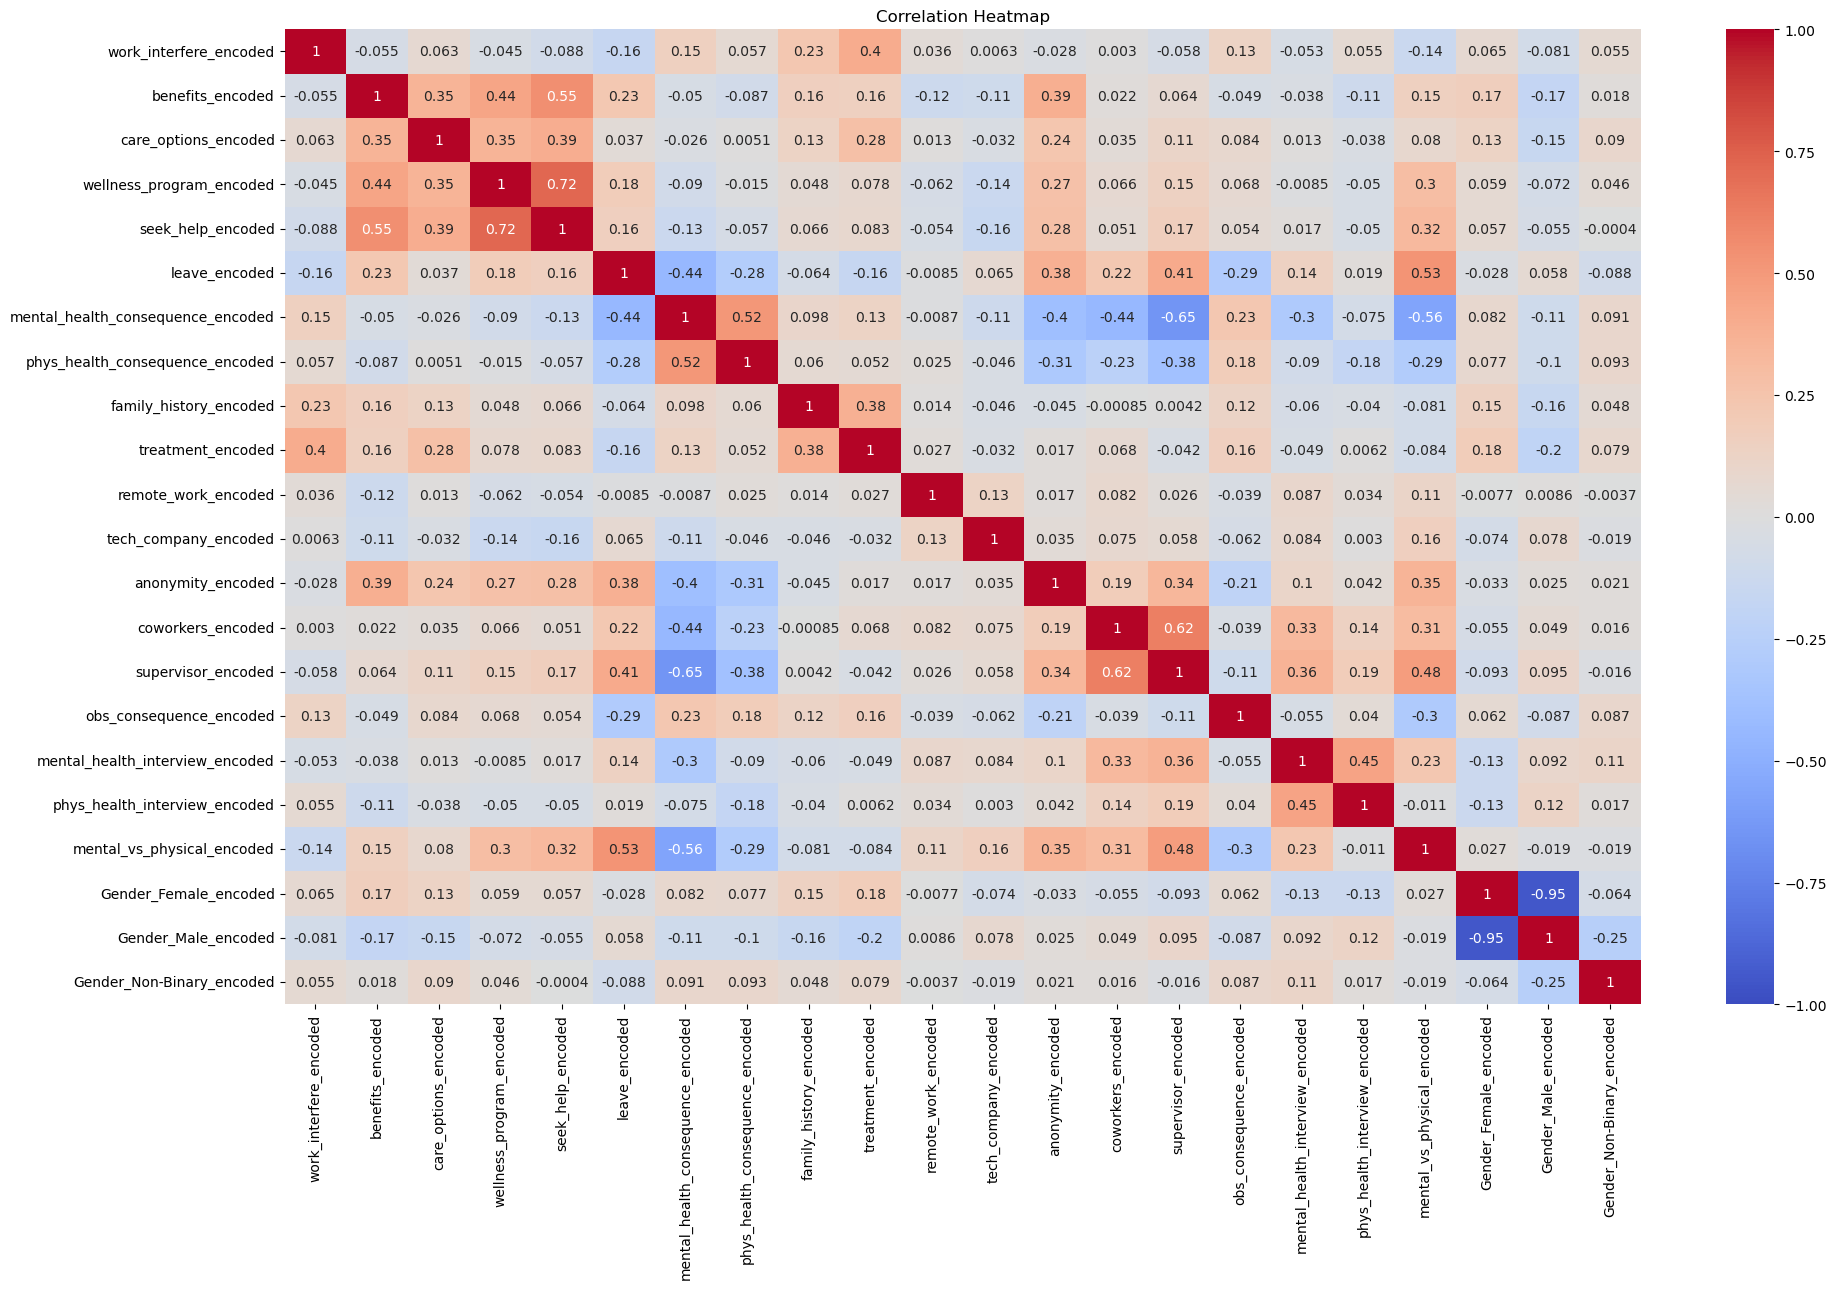

,work_interfere_encoded,benefits_encoded,care_options_encoded,wellness_program_encoded,seek_help_encoded,leave_encoded,mental_health_consequence_encoded,phys_health_consequence_encoded,family_history_encoded,treatment_encoded,...,anonymity_encoded,coworkers_encoded,supervisor_encoded,obs_consequence_encoded,mental_health_interview_encoded,phys_health_interview_encoded,mental_vs_physical_encoded,Gender_Female_encoded,Gender_Male_encoded,Gender_Non-Binary_encoded
work_interfere_encoded,1.000000,-0.055287,0.062836,-0.044958,-0.087846,-0.159728,0.149519,0.056958,0.228729,0.401127,...,-0.027967,0.003036,-0.057653,0.125752,-0.052989,0.054702,-0.137598,0.064864,-0.081160,0.055240
benefits_encoded,-0.055287,1.000000,0.352915,0.439193,0.551535,0.225805,-0.050123,-0.086812,0.156482,0.155897,...,0.389723,0.021817,0.064048,-0.049207,-0.037994,-0.113981,0.150090,0.171561,-0.172084,0.017984
care_options_encoded,0.062836,0.352915,1.000000,0.354133,0.390809,0.037291,-0.026021,0.005096,0.125619,0.278839,...,0.241460,0.035060,0.113989,0.084167,0.013051,-0.037578,0.080235,0.129092,-0.153672,0.090102
wellness_program_encoded,-0.044958,0.439193,0.354133,1.000000,0.721095,0.183549,-0.089877,-0.014531,0.047738,0.078018,...,0.273052,0.066198,0.147645,0.067871,-0.008538,-0.050342,0.296709,0.058854,-0.072064,0.045819
seek_help_encoded,-0.087846,0.551535,0.390809,0.721095,1.000000,0.157697,-0.130414,-0.057017,0.065877,0.082636,...,0.275376,0.050786,0.165679,0.053636,0.017440,-0.050156,0.324555,0.056920,-0.054706,-0.000396
leave_encoded,-0.159728,0.225805,0.037291,0.183549,0.157697,1.000000,-0.444882,-0.279217,-0.064382,-0.159103,...,0.380010,0.223455,0.410492,-0.293596,0.143168,0.019301,0.530768,-0.027592,0.057940,-0.088365


In [16]:
#Dictionaries for maps I will be applying to all of my new columns. 

map2 = {'No': 0, 'Maybe': .5, 'Yes': 1}
map3 = {'No': 0, 'Yes': 1}
map4 = {'Difficult':0, 'Easy':1}


#Creating new columns by applying the map function to referenced column, converting all words to numbers 0-2
#there is surely a way to automate this, 
my_df['work_interfere_encoded'] = my_df['work_interfere'].map(map3)
my_df['benefits_encoded'] = my_df['benefits'].map(map3)
my_df['care_options_encoded'] = my_df['care_options'].map(map3)
my_df['wellness_program_encoded'] = my_df['wellness_program'].map(map3)
my_df['seek_help_encoded'] = my_df['seek_help'].map(map3)
my_df['leave_encoded'] = my_df['leave'].map(map4)
my_df['mental_health_consequence_encoded'] = my_df['mental_health_consequence'].map(map2)
my_df['phys_health_consequence_encoded'] = my_df['phys_health_consequence'].map(map2)
my_df['work_interfere_encoded'] = my_df['work_interfere'].map(map3)
my_df['family_history_encoded'] = my_df['family_history'].map(map3)
my_df['treatment_encoded'] = my_df['treatment'].map(map3)
my_df['remote_work_encoded'] = my_df['remote_work'].map(map3)
my_df['tech_company_encoded'] = my_df['tech_company'].map(map3)
my_df['anonymity_encoded'] = my_df['anonymity'].map(map3)
my_df['coworkers_encoded'] = my_df['coworkers'].map(map2)
my_df['supervisor_encoded'] = my_df['supervisor'].map(map3)
my_df['obs_consequence_encoded'] = my_df['obs_consequence'].map(map3)
my_df['mental_health_interview_encoded'] = my_df['mental_health_interview'].map(map2)
my_df['phys_health_interview_encoded']  = my_df['phys_health_interview'].map(map2)
my_df['mental_vs_physical_encoded'] = my_df['mental_vs_physical'].map(map3)
my_df['Gender_Female_encoded']	= my_df['Gender_Female'].astype(int)
my_df['Gender_Male_encoded']	= my_df['Gender_Male'].astype(int)
my_df['Gender_Non-Binary_encoded']	= my_df['Gender_Non-Binary'].astype(int)



#selecting all the numeric(encoded) columns i just created and making a new numbers only df
numeric_columns = my_df.select_dtypes(include=[np.number]).columns
my_encoded_df = my_df[numeric_columns]

#matrix using df we just created, min_periods=1 allows it to pass over "Unknown" values, which helps a ton. Previously i was just dropping every 
#instance of "unknown" which reduced the df from 1200 to 150.
my_correlation_matrix = my_encoded_df.corr(method='pearson', min_periods=1)

         
display(my_correlation_matrix)

plt.figure(figsize=(20, 13))
sns.heatmap(my_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



temp_age_df = my_correlation_matrix.copy(deep=True)
temp_age_df.head(6)


In [17]:
#This code turns every float to a positive and then sums by row. Using to calculate total correlation (positive and negative). Printed are the rows in descending order.

positive_array = np.abs(my_correlation_matrix)
row_sums = np.sum(positive_array, axis=1)


sorted_indices = np.argsort(row_sums)[::-1]

# Sort the row sums in descending order
sorted_row_sums = row_sums[sorted_indices]

# Print the sorted results
print("Total Sum of Positive Entries by Row (Sorted in Descending Order):")
for idx in sorted_indices:
    print(f"Row {idx}: {sorted_row_sums[np.where(sorted_indices == idx)[0][0]]}")

Total Sum of Positive Entries by Row (Sorted in Descending Order):
Row 6: 5.704177701107433
Row 18: 5.552828142779319
Row 14: 5.41814383868104
Row 5: 4.9602292596271775
Row 12: 4.724948546175345
Row 4: 4.504827891062318
Row 1: 4.487780511219296
Row 3: 4.261981102917034
Row 7: 4.1323664461824094
Row 13: 4.040763339509861
Row 20: 3.9347250330073167
Row 16: 3.802326572064778
Row 9: 3.657694471939207
Row 2: 3.656126198935791
Row 19: 3.622814600345114
Row 15: 3.454563416895038
Row 8: 2.9905993495113417
Row 0: 2.949745375380044
Row 17: 2.8050972501568596
Row 11: 2.5220531963363015
Row 21: 2.234847258583465
Row 10: 1.9161701070974326


C:\Users\Louis\AppData\Local\Temp\ipykernel_15276\2752375623.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sorted_row_sums = row_sums[sorted_indices]
C:\Users\Louis\AppData\Local\Temp\ipykernel_15276\2752375623.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Row {idx}: {sorted_row_sums[np.where(sorted_indices == idx)[0][0]]}")


In [18]:
'''
HIGHEST CORRELATIONS

wellness_program
Has your employer ever discussed 
mental health as part of an employee wellness program?
BY
seek_help
Does your employer provide resources to 
learn more about mental health issues and how to seek help?


mental_health_consequence
Do you think that discussing a mental health issue with 
your employer would have negative consequences?
BY
supervisor         
Would you be willing to discuss a mental health issue with your direct supervisor?


supervisor
Would you be willing to discuss a mental health issue with your direct supervisor?
BY
coworkers
Would you be willing to discuss a mental health issue with your coworkers?


COLUMNS WITH HIGHEST TOTAL CORRELATION - USES ABOVE CODE - ALL CORRS POSITIVE AND SUMMED BY ROW

mental_health_consequence - 5.704177701107433
mental_vs_physical - 5.552828142779319
supervisor - 5.41814383868104
leave - 4.9602292596271775
anonymity - 4.724948546175345

'''


'\nHIGHEST CORRELATIONS\n\nwellness_program\nHas your employer ever discussed \nmental health as part of an employee wellness program?\nBY\nseek_help\nDoes your employer provide resources to \nlearn more about mental health issues and how to seek help?\n\n\nmental_health_consequence\nDo you think that discussing a mental health issue with \nyour employer would have negative consequences?\nBY\nsupervisor         \nWould you be willing to discuss a mental health issue with your direct supervisor?\n\n\nsupervisor\nWould you be willing to discuss a mental health issue with your direct supervisor?\nBY\ncoworkers\nWould you be willing to discuss a mental health issue with your coworkers?\n\n\nCOLUMNS WITH HIGHEST TOTAL CORRELATION - USES ABOVE CODE - ALL CORRS POSITIVE AND SUMMED BY ROW\n\nmental_health_consequence - 5.704177701107433\nmental_vs_physical - 5.552828142779319\nsupervisor - 5.41814383868104\nleave - 4.9602292596271775\nanonymity - 4.724948546175345\n\n'

In [19]:
'''All of the entries in my_df are boiled down to Y/N/Maybe, but not all mean the same thing. For instance, if you look at 2 variables:

benefits:Does your employer provide mental health benefits? - Yes is a good thing, having benefits is positive for the employee

HOWEVER

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences? - Yes is a bad thing, there is a fear of punishment

THEREFORE I have attempted to create a system that helps us interpret this


YES = GOOD(does the company help support you?): ['benefits_encoded', 'care_options_encoded', wellness_program_encoded, seek_help_encoded, anonymity_encoded, leave_encoded, mental_vs_physical_encoded, 
                                coworkers_encoded, supervisor_encoded mental_health_interview, phys_health_interview]
                                
YES = BAD(Will the company punish you?): mental_health_consequence, phys_health_consequence, obv_consequence,

'''

"All of the entries in my_df are boiled down to Y/N/Maybe, but not all mean the same thing. For instance, if you look at 2 variables:\n\nbenefits:Does your employer provide mental health benefits? - Yes is a good thing, having benefits is positive for the employee\n\nHOWEVER\n\nmental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences? - Yes is a bad thing, there is a fear of punishment\n\nTHEREFORE I have attempted to create a system that helps us interpret this\n\n\nYES = GOOD(does the company help support you?): ['benefits_encoded', 'care_options_encoded', wellness_program_encoded, seek_help_encoded, anonymity_encoded, leave_encoded, mental_vs_physical_encoded, \n                                coworkers_encoded, supervisor_encoded mental_health_interview, phys_health_interview]\n                                \nYES = BAD(Will the company punish you?): mental_health_consequence, phys_health_consequence, obv_con

In [20]:
#Creating dfs. My goal is to get the mean of each row of each dataframe, and see if there is a correlation between company support and company punishment
good_df = my_encoded_df[['benefits_encoded', 'care_options_encoded', 'wellness_program_encoded', 'seek_help_encoded', 'anonymity_encoded', 'leave_encoded', 'mental_vs_physical_encoded', 
                                'coworkers_encoded', 'supervisor_encoded', 'mental_health_interview_encoded', 'phys_health_interview_encoded']]

bad_df = my_encoded_df[['mental_health_consequence_encoded', 'phys_health_consequence_encoded', 'obs_consequence_encoded']]

#Calculating the mean of every row, and saving the values to a new column for respective df.
good_df['GoodMean'] = good_df.mean(axis=1)
bad_df['BadMean'] = bad_df.mean(axis=1)

#Creating new df containing only 2 columns we just created. 
combined_df = pd.DataFrame({
    'GoodMean': good_df['GoodMean'],
    'BadMean': bad_df['BadMean']
})


correlation = combined_df.corr().iloc[0, 1]
display("Correlation between GoodMean and BadMean:", correlation)
display(combined_df)
#I can see that there is a -0.37% correlation between the values, which I would argue is meaningful.


C:\Users\Louis\AppData\Local\Temp\ipykernel_15276\77831815.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_df['GoodMean'] = good_df.mean(axis=1)
C:\Users\Louis\AppData\Local\Temp\ipykernel_15276\77831815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_df['BadMean'] = bad_df.mean(axis=1)


'Correlation between GoodMean and BadMean:'

-0.3769107643382431

,GoodMean,BadMean
Timestamp,,
2014-08-27 11:29:31,0.700000,0.000000
2014-08-27 11:29:37,0.000000,0.166667
2014-08-27 11:29:44,0.400000,0.000000
2014-08-27 11:29:46,0.227273,1.000000
2014-08-27 11:30:22,0.750000,0.000000
...,...,...
2015-09-12 11:17:21,0.187500,0.000000
2015-09-26 01:07:35,0.500000,0.000000
2015-11-07 12:36:58,0.200000,0.666667


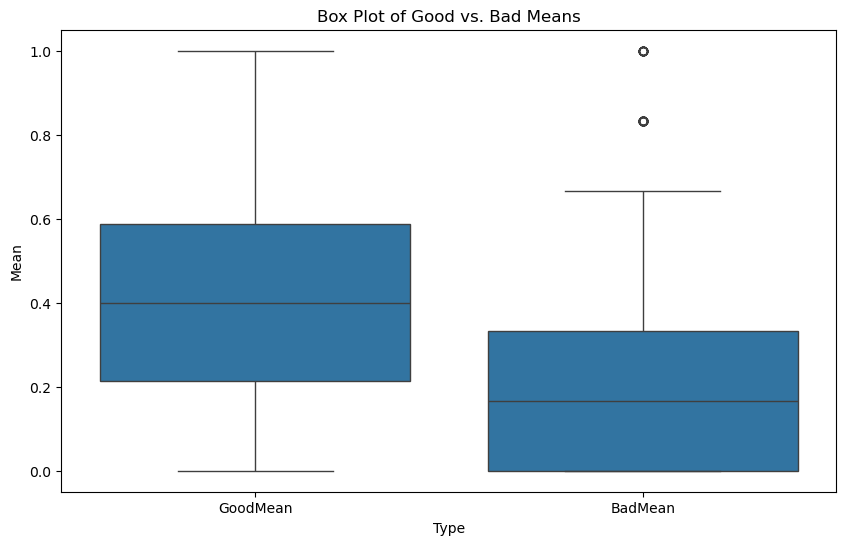

In [21]:
#Box plot that shows relationship between Good Means and Bad Means. Could use additional parameters to make it more informative, this is just a starting point.
melted_df = combined_df.melt(value_vars=['GoodMean', 'BadMean'], var_name='Type', value_name='Mean')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Mean', data=melted_df)
plt.title('Box Plot of Good vs. Bad Means')
plt.xlabel('Type')
plt.ylabel('Mean')
plt.show()

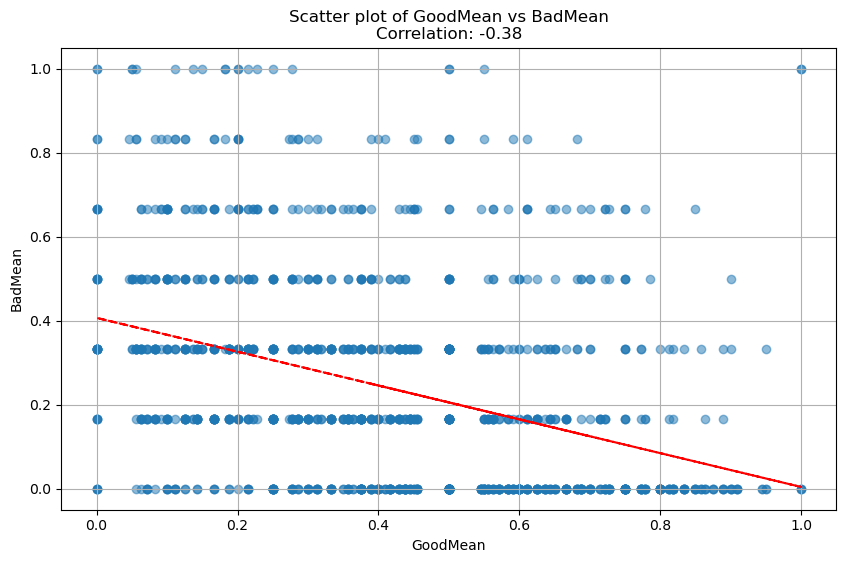

'\nThis graph shows the relationship between our two values "GoodMean" and "BadMean". \nStarting off, I notice the top left of the graph. While it\'s a very small sample size, I see that of all values where\ny=1, the majority of them are on the far left side of the graph. This very small trend is also represented with our trendline.\n\nThe trendline shows us that employees who are more likely to expect punishment for speaking on their health issues\nare more likely to be at companies that do not go out of their way to support mental health(benefits, ease of leave, support from coworkers)\n\nIn short, companies that punish employees for speaking about their health concerns are less likely to offer benefits/support to their employees.\n'

In [22]:
#Graph that shows every row in df on x-axis, and the corresponding good and bad means for each. Very busy, hard to get info from, but I think there is good data hiding somewhere in there.

combined_df_reset = combined_df.reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.scatter(combined_df_reset['GoodMean'], combined_df_reset['BadMean'], alpha=0.5)

# Add trendline
z = np.polyfit(combined_df_reset['GoodMean'], combined_df_reset['BadMean'], 1)
p = np.poly1d(z)
plt.plot(combined_df_reset['GoodMean'], p(combined_df_reset['GoodMean']), "r--")

# Calculate correlation coefficient
corr, _ = stats.pearsonr(combined_df_reset['GoodMean'], combined_df_reset['BadMean'])

plt.title(f'Scatter plot of GoodMean vs BadMean\nCorrelation: {corr:.2f}')
plt.xlabel('GoodMean')
plt.ylabel('BadMean')
plt.grid(True)
plt.show()

#this explenation assumes we already know what GoodMean and BadMean are and how/why we calculated them
'''
This graph shows the relationship between our two values "GoodMean" and "BadMean". 
Starting off, I notice the top left of the graph. While it's a very small sample size, I see that of all values where
y=1, the majority of them are on the far left side of the graph. This very small trend is also represented with our trendline.

The trendline shows us that employees who are more likely to expect punishment for speaking on their health issues
are more likely to be at companies that do not go out of their way to support mental health(benefits, ease of leave, support from coworkers)

In short, companies that punish employees for speaking about their health concerns are less likely to offer benefits/support to their employees.
'''

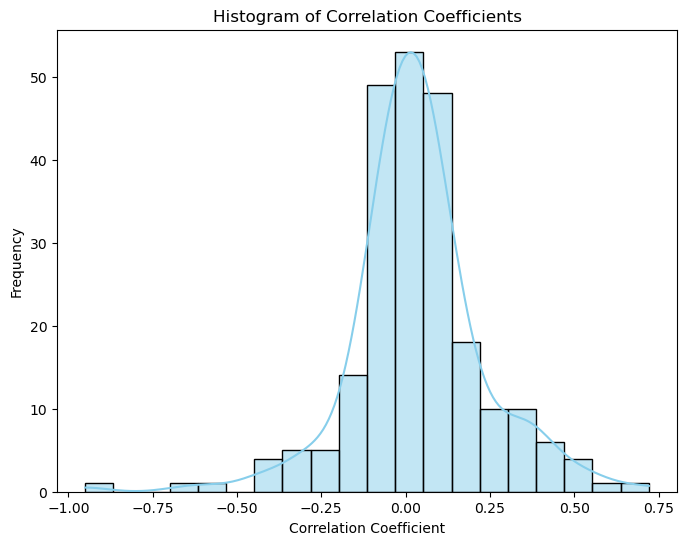

In [23]:
#Graph that shows spread of correlations from matrix. Not super meaningful I don't think, at least not in it's current state. Could use some magic

corr_values = my_correlation_matrix.values
corr_values = corr_values[np.triu_indices_from(corr_values, k=1)]
corr_df = pd.DataFrame(corr_values, columns=['Correlation'])

plt.figure(figsize=(8, 6))
sns.histplot(corr_df['Correlation'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Correlation Coefficients')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.show()

In [26]:
fig = px.histogram(df, x='age_group',color='anonymity')
fig.update_layout()
fig.show()

# mental_health_consequence - 5.704177701107433
# mental_vs_physical - 5.552828142779319
# supervisor - 5.41814383868104
# leave - 4.9602292596271775
# anonymity - 4.724948546175345


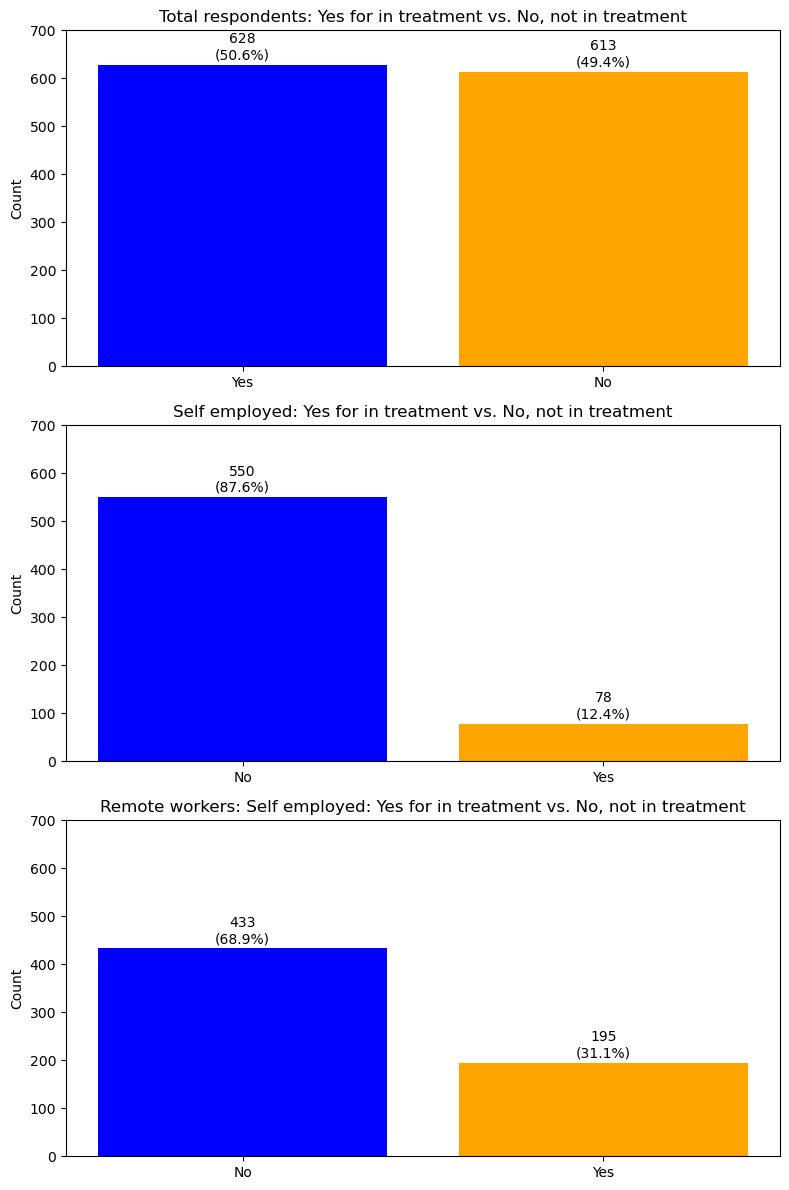

In [42]:
# Create a dataframe to evaluate treatment for self employed and remote workers
demographic_df = df[['treatment', 'self_employed', 'remote_work']]
clean_demographic_df = demographic_df.dropna()

# Calculate the total counts of 'Yes' and 'No' for each column
treatment_counts = clean_demographic_df['treatment'].value_counts()

# Filter the dataframe for 'treatment' == 'Yes'
treatment_yes_df = clean_demographic_df[clean_demographic_df['treatment'] == 'Yes']

self_employed_counts = treatment_yes_df['self_employed'].value_counts()
remote_work_counts = treatment_yes_df['remote_work'].value_counts()

#remote_work_counts

# Create a bar plot to visualize the counts and percentages
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Function to annotate bars with counts and percentages
def annotate_bars(ax, counts):
    total = sum(counts)
    for i, count in enumerate(counts):
        percentage = count / total * 100
        ax.text(i, count + 5, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

# Plot for 'treatment' column
ax[0].bar(treatment_counts.index, treatment_counts.values, color=['blue', 'orange'])
ax[0].set_ylabel('Count')
ax[0].set_title('Total respondents: Yes for in treatment vs. No, not in treatment')
ax[0].set_ylim(0, 700)  # Set the y-axis range to go up to 700
annotate_bars(ax[0], treatment_counts.values)

# Plot for 'self_employed' column
ax[1].bar(self_employed_counts.index, self_employed_counts.values, color=['blue', 'orange'])
ax[1].set_ylabel('Count')
ax[1].set_title('Self employed: Yes for in treatment vs. No, not in treatment')
ax[1].set_ylim(0, 700)  # Set the y-axis range to go up to 700
annotate_bars(ax[1], self_employed_counts.values)

# Plot for 'remote_work' column
ax[2].bar(remote_work_counts.index, remote_work_counts.values, color=['blue', 'orange'])
ax[2].set_ylabel('Count')
ax[2].set_title('Remote workers: Self employed: Yes for in treatment vs. No, not in treatment')
ax[2].set_ylim(0, 700)  # Set the y-axis range to go up to 700
annotate_bars(ax[2], remote_work_counts.values)

plt.tight_layout()
plt.show()

In [28]:
# Count of "Yes" and "No" values in the "treatment" column
treatment_counts = clean_demographic_df['treatment'].value_counts()
print("Treatment Counts:")
print(treatment_counts)

# Count of "Yes" and "No" values in the "self_employed" column
self_employed_counts = clean_demographic_df['self_employed'].value_counts()
print("\nSelf Employed Counts:")
print(self_employed_counts)

# Count of "Yes" and "No" values in the "remote_work" column
remote_work_counts = clean_demographic_df['remote_work'].value_counts()
print("\nRemote Work Counts:")
print(remote_work_counts)

Treatment Counts:
treatment
Yes    628
No     613
Name: count, dtype: int64

Self Employed Counts:
self_employed
No     1095
Yes     146
Name: count, dtype: int64

Remote Work Counts:
remote_work
No     871
Yes    370
Name: count, dtype: int64


In [32]:
from tabulate import tabulate

# Count of "Yes" and "No" values in the columns
treatment_counts = clean_demographic_df['treatment'].value_counts()
self_employed_counts = clean_demographic_df['self_employed'].value_counts()
remote_work_counts = clean_demographic_df['remote_work'].value_counts()

# Create a new DataFrame with the counts
counts_df = pd.DataFrame({
    'In Treatment': treatment_counts,
    'Self Employed': self_employed_counts,
    'Remote Worker': remote_work_counts
})

# Fill NaN values with 0
counts_df = counts_df.fillna(0)

# Display the counts in a single table with updated column titles and row/column lines
print(tabulate(counts_df, headers='keys', tablefmt='grid'))

+-----+----------------+-----------------+-----------------+
|     |   In Treatment |   Self Employed |   Remote Worker |
+=====+================+=================+=================+
| No  |            613 |            1095 |             871 |
+-----+----------------+-----------------+-----------------+
| Yes |            628 |             146 |             370 |
+-----+----------------+-----------------+-----------------+


In [39]:
clean_demographic_df["self_employed"].value_counts()

self_employed
No     1095
Yes     146
Name: count, dtype: int64